In [1]:
# Imports
import music21
from music21 import converter
from music21.pitch import Pitch
from music21.note import Note
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../')

from hexachord import solmize
from hexachord.solmization import Solmization
from hexachord.gamut_graph import SoftContinentalGamut
from hexachord.utils import as_stream

## Issue 1: many paths of identical cost

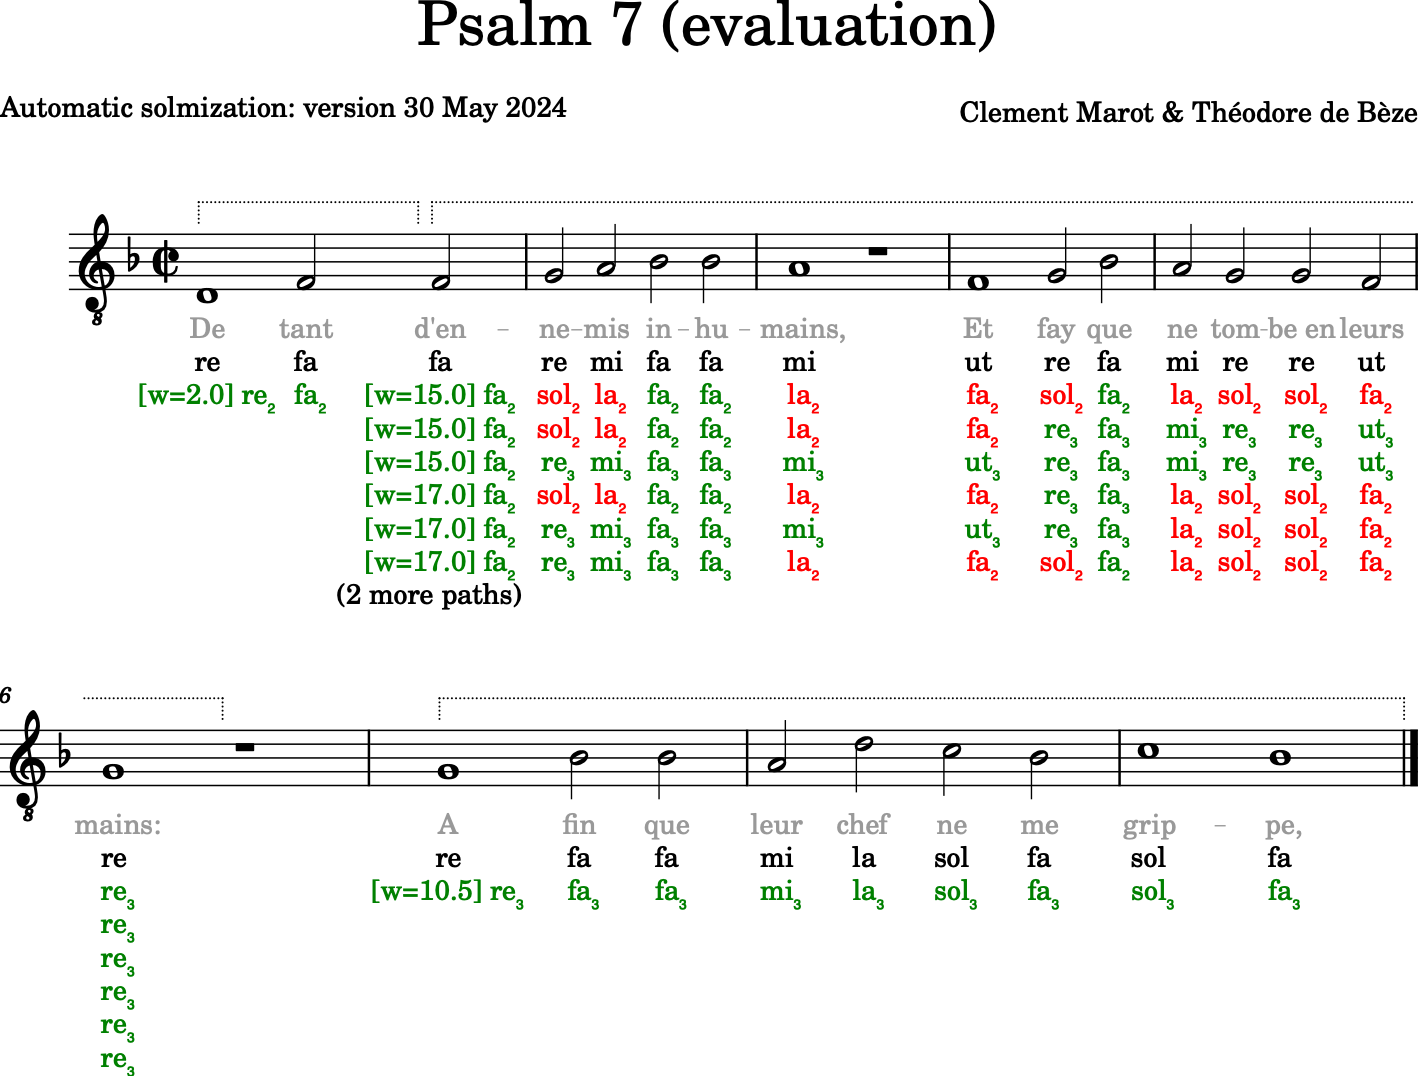

In [2]:
score = music21.converter.parse('../scores/issues/issue-01.mxl')
gamut = SoftContinentalGamut(hexachord_kws=dict(fa_super_la_weight=1))
solmization = solmize(score, gamut=gamut)
solmization.annotate(
    target_lyrics=2, 
    lyric_offset=3,
    grey_lyrics_num=1
)
score.show()

In [3]:
score = music21.converter.parse('../scores/issues/issue-01.mxl')
gamut = SoftContinentalGamut(hexachord_kws=dict(fa_super_la_weight=1.5))
solmization = Solmization(score, gamut=gamut)
solmization.annotate(score.parts[0],
    target_lyrics=2, 
    lyric_offset=3,
    grey_lyrics_num=1
)
score.show()

ValueError: Use StreamSolmation for stream inputs

The many paths here are caused by the jumps between F and B-flat in a soft gamut:

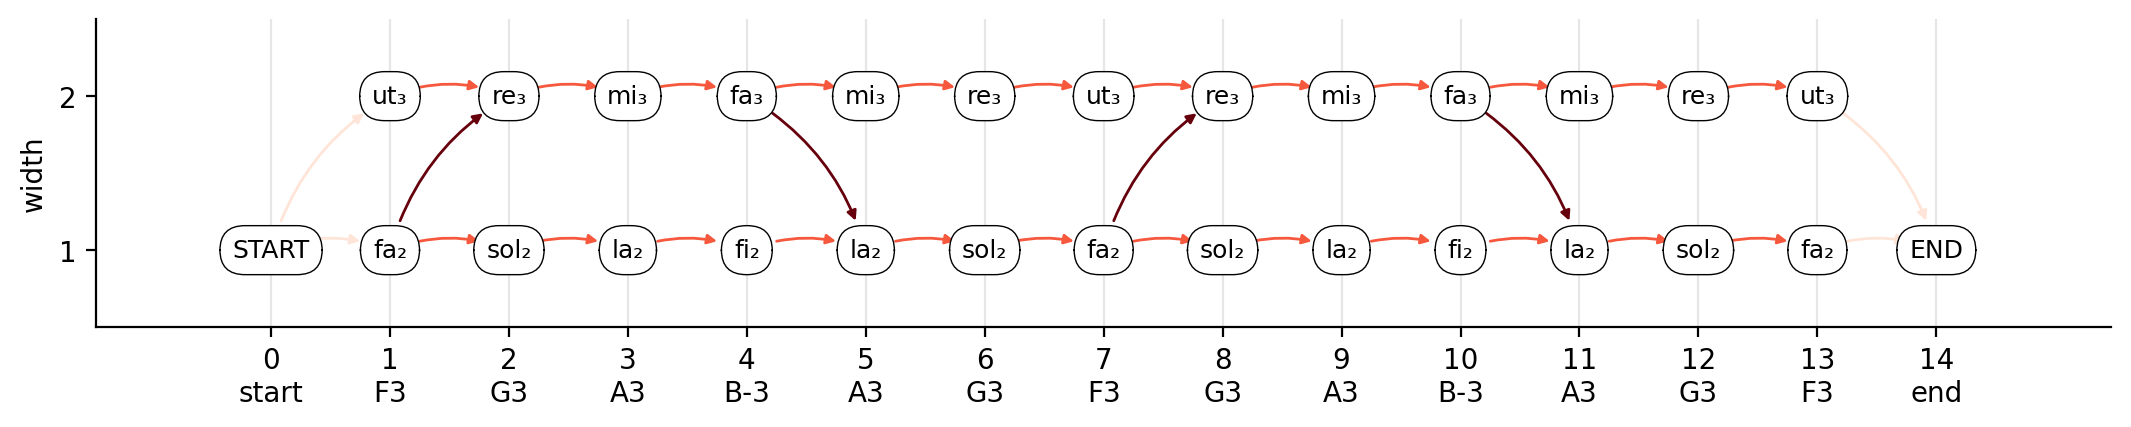

In [ ]:
stream = as_stream('F3 B-3 F3 B-3 F3')
sol = Solmization(stream, gamut='soft')
sol.annotate(stream)
sol.draw()

Here is the skeleton resulting in multiple paths of identical cost. The question is basically where you mutate to the next hexichord. The target annotation mutates immediately, avoiding extensive fa-super-la's. So one fix would be to increase the fa-super-la weight.

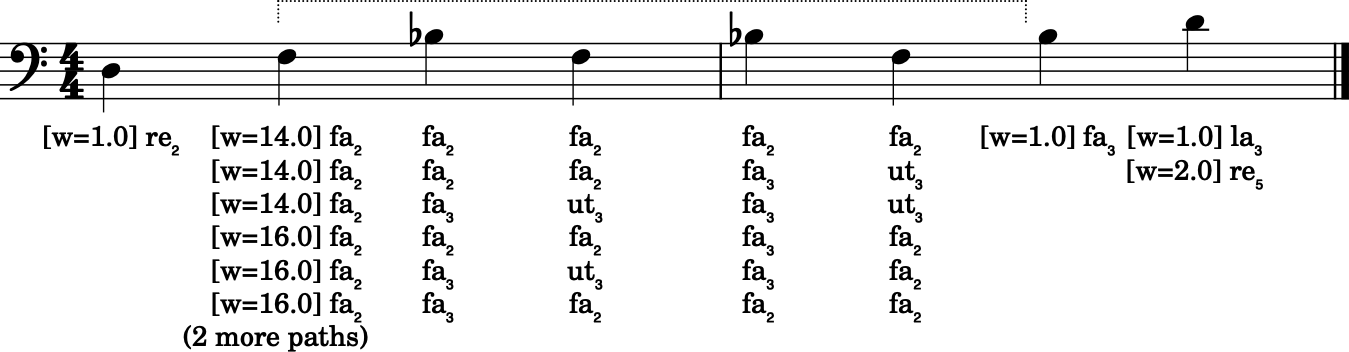

In [ ]:
stream = as_stream('D3 F3 B-3 F3 B-3 F3 B-3 D4')
sol = Solmization(stream, gamut='soft')
sol.annotate(stream)
stream.show()

## Issue with ties

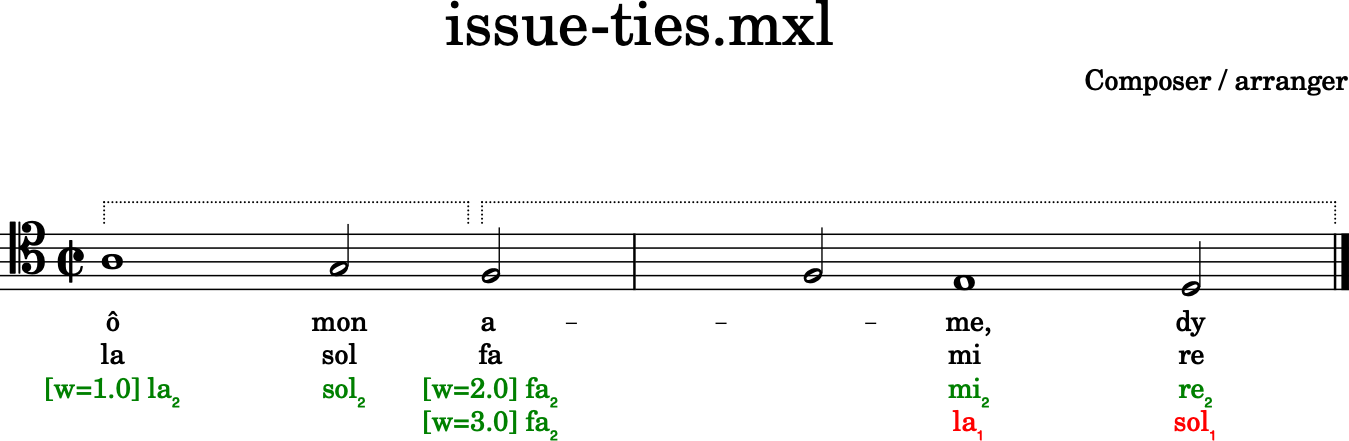

In [ ]:
score = music21.converter.parse('../scores/issues/issue-ties.mxl')
solmization = solmize(score, style='continental')
solmization.annotate(target_lyrics=2, lyric_offset=3)
score.show()

## Issue from psalm 4

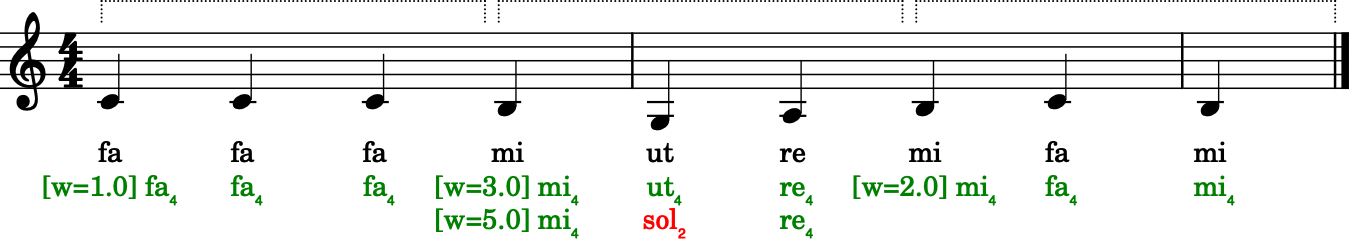

In [ ]:
exPsalm04 = 'C4 C4 C4 B3 G3 A3 B3 C4 B3'
pitches = [Pitch(p) for p in exPsalm04.split(' ')]
stream = music21.stream.Stream([Note(p) for p in pitches])
targets = 'fa fa fa mi ut re mi fa mi'.split(' ')
for note, syll in zip(stream, targets): note.lyric = syll
sol = solmize(stream, gamut='hard-continental')
sol.annotate(targets=targets, lyric_offset=2)
stream.show()

## Notes

### Parse graphs change when extending the sequence

Note that adding pitches may change the parse graph: depending on how the sequence continues, certain paths may be pruned. If a sequence $A$ is a prefix of $B$, the parse graph of $A$ need not be a subgraph of $B$. Here is a simple example:

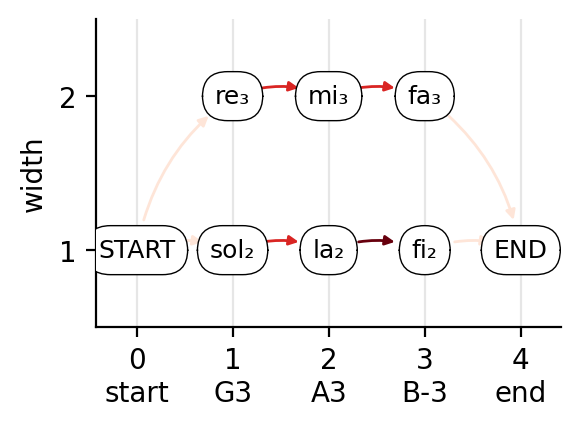

In [ ]:
solmize('G3 B-3'.split(' '), gamut='soft-continental').draw_parse()

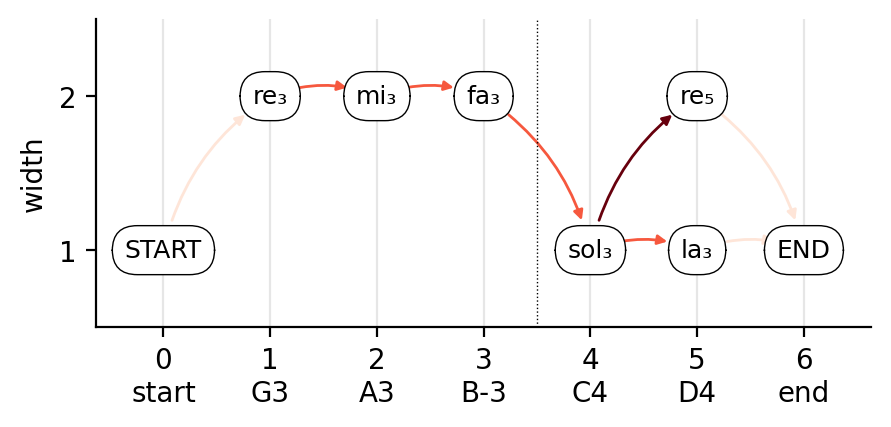

In [ ]:
solmize('G3 B-3 D4'.split(' '), gamut='soft-continental').draw_parse()